In [1]:
from IPython.display import Image

# 4장. 로지스틱 회귀 분류

## 4.1. 적응선형뉴론(Adaptive Linear Neurons, ALN)

\begin{align*}
 z_i &= \sum_{i=1}^d w_j x_{ij} = \mathbf{w}^T\mathbf{x}_i\\ 
 &\Downarrow \\ 
 L(\mathbf{w}) &=\frac{1}{2} \sum_{i=1}^d \left(y_i - \phi(z_i) \right)^2 \;\;
  \Rightarrow 
  \begin{cases}
 \hat{y}_i = 1 & \text{ when } \hat{\phi}(z_i) > h \\ 
 \hat{y}_i = 0 & \text{ when } \hat{\phi}(z_i) \leq h 
\end{cases}\\ 
 &\Uparrow \\ 
 \phi(z) &= z \;\leftarrow\;\text{ALN} 
\end{align*}

## 4.2. 로지스틱 회귀(Logistic regression)

\begin{align*}
 \log \frac{p_i}{1 - p_i} &= z_i \left( =\mathbf{w}^T \mathbf{x}_i \right) \\ 
 &\Downarrow \\ 
 p_i &= \frac{1}{1 + e^{-z_i}} = \phi(z_i)
\end{align*}

\begin{align*}
 L(y_1, \cdots, y_n \,| \,\mathbf{x}_1, \cdots, \mathbf{x}_n) &= \prod_{i=1}^n p_i^{y_i} (1 - p_i)^{1-y_i}\\ 
 &\Downarrow \\ 
 \log L&= \sum_{i=1}^n \left[ y_i \log p_i +(1-y_i) \log (1 - p_i) \right]\\ 
 &\Downarrow \\
 \text{로지스텍 회귀에서의 손실}&\text{함수는 음의 로그우도함수} \\
 l(\mathbf{w}) &= -\sum_{i=1}^n \left[ y_i \log p_i +(1-y_i) \log (1 - p_i) \right] \\
   &= -\sum_{i=1}^n \left[ y_i \log \phi\left(\mathbf{w}^T\mathbf{x}_i  \right)+(1-y_i) \log \left(1 - \phi\left(\mathbf{w}^T\mathbf{x}_i  \right)\right) \right]
\end{align*}

## 4.3. 과대적합에 대한 규제화(regularization against overfitting)

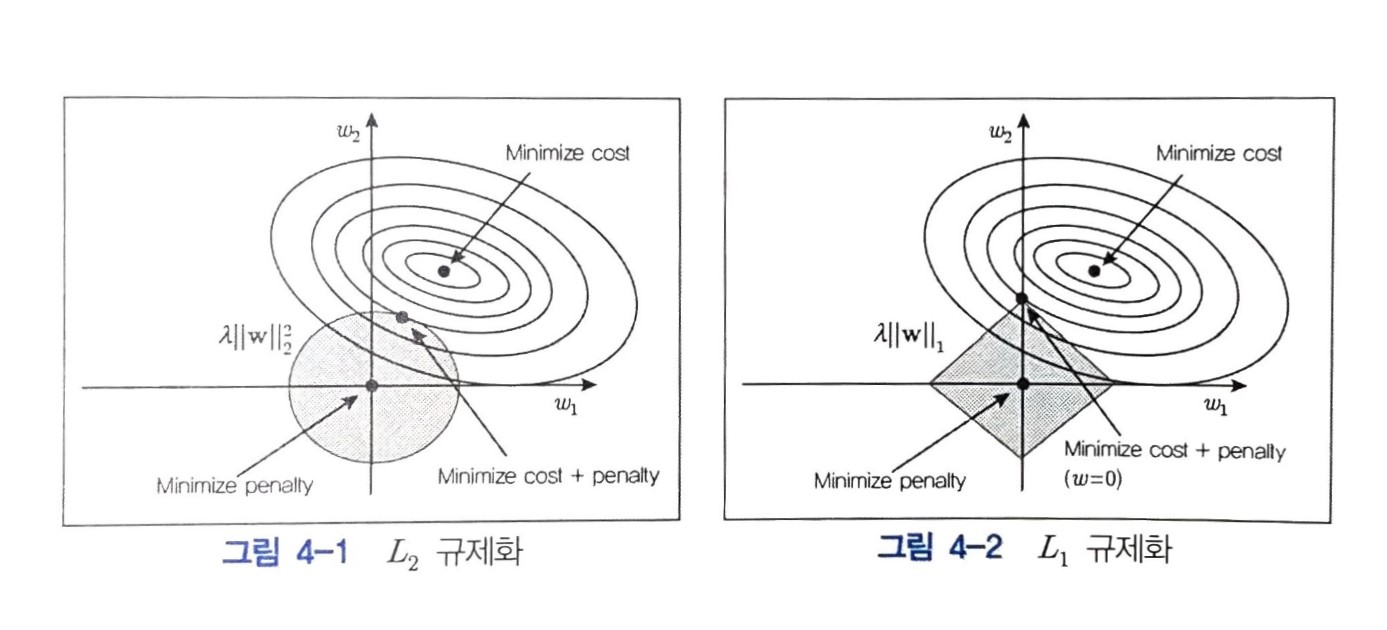

In [2]:
Image('./figs/ch04_1.jpg', width=700)

\begin{align*}
 l_R(\mathbf{w}) &= l(\mathbf{w}) + \lambda \sum_{j=1}^d w_j^2\\ 
 l_R(\mathbf{w}) &= l(\mathbf{w}) + \lambda \sum_{j=1}^d \left| w_j \right|
\end{align*}

## 4.4. Scikit을 이용한 로지스틱 함수: $C=1/\lambda$

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

X = iris.drop('species', axis=1)
y = iris['species']

In [4]:
from sklearn.preprocessing import LabelEncoder

classle = LabelEncoder()
y = classle.fit_transform(y.values)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

---

In [6]:
from sklearn.linear_model import LogisticRegression

Logit = LogisticRegression(C=100, multi_class='ovr', random_state=1)  # C=1/lambda
Logit.fit(X_train, y_train)

y_train_pred = Logit.predict(X_train)
y_test_pred = Logit.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9523809523809523
0.9777777777777777


---

In [8]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


---

In [10]:
import joblib

joblib.dump(Logit, './files/save.pkl')
logit_from_joblib = joblib.load('./files/save.pkl')
logit_pred = logit_from_joblib.predict(X_test)

print(accuracy_score(y_test, logit_pred))
print(confusion_matrix(y_test, logit_pred))
print(logit_pred)

0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
[2 0 0 1 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]


---

In [13]:
import pandas as pd
import numpy as np

dat_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                      'wine/wine.data', header=None)

dat_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
dat_wine.columns = ['class label', 'alchohol', 'malic acid', 'ash',
                   'alcalinity of ash', 'magnesium', 'total phenols',
                   'flavanoids', 'nonflavanoid phenols',
                   'proanthocyanins', 'color intensity', 'hue',
                   'OD208', 'proline']
print('class label', np.unique(dat_wine['class label']))
dat_wine.head()

class label [1 2 3]


,class label,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
from sklearn.model_selection import train_test_split

X, y = dat_wine.iloc[:, 1:].values, dat_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [26]:
from sklearn.linear_model import LogisticRegression

penalty = ['l2', 'l1']
Cs = [10.0, 1.0, 0.1]

for p in penalty:
    for C in Cs:
        lr = LogisticRegression(penalty=p, C=C, solver='liblinear')
        lr.fit(X_train, y_train)
        print(f'Train accuracy with {p} and Lambda={1/C:4.1f}:', np.round(lr.score(X_train, y_train), 3))
        print(f' Test accuracy with {p} and Lambda={1/C:4.1f}:', np.round(lr.score(X_test, y_test), 3))
        print(f' bias: {lr.intercept_}')
        print(f' 계수추정치: {lr.coef_}')

Train accuracy with l2 and Lambda= 0.1: 1.0
 Test accuracy with l2 and Lambda= 0.1: 0.926
 bias: [-0.96455996  1.2779641  -0.22390343]
 계수추정치: [[-8.35654930e-01  1.44150339e+00  1.46570952e+00 -1.27574189e+00
   2.09578891e-02  9.54417246e-01  3.00222611e+00 -7.24568171e-02
  -1.22897006e+00 -5.54461410e-01 -1.84306529e-02  6.28614502e-01
   2.67981646e-02]
 [ 1.13139185e+00 -2.14648848e+00 -1.08147513e+00  7.36944196e-01
  -1.74810242e-02 -9.66019726e-01  1.17279552e+00  2.74980588e+00
   1.48013139e+00 -2.57898067e+00  3.18852569e+00 -6.16459838e-01
  -2.25265484e-02]
 [-7.02353138e-01  1.19098654e+00  5.88126996e-01  4.03837602e-02
   7.27518006e-02 -3.70619162e-01 -3.76294697e+00 -6.02758219e-01
  -7.46352565e-01  1.33638672e+00 -1.36735984e+00 -2.11442837e+00
   2.98503268e-03]]
Train accuracy with l2 and Lambda= 1.0: 0.984
 Test accuracy with l2 and Lambda= 1.0: 0.944
 bias: [-0.16655119  0.26945958 -0.07022366]
 계수추정치: [[-3.58983950e-01  4.10637468e-01  3.53872093e-01 -7.4297934